# Working with Superphot+

Superphot+ was designed to rapidly fit photometric SN-like light curves to an empirical model for subsequent classification or analysis.
This tutorial briefly covers how to import light curves directly from ALeRCE or ANTARES, apply pre-processing for improved quality, and run various sampling methods to fit the light curves.

## Data Importing and Preprocessing

Superphot+ is built on SNAPI (LINK), which provides functionality for easy importing and pre-processing of photometric data from various alert brokers. Here, we use SNAPI to import a ZTF light curve from ALeRCE.

In [1]:
from dustmaps.config import config

config["data_dir"] = "."  # ensure dustmaps path is correct

# from superphot_plus.file_utils import read_single_lightcurve, save_single_lightcurve
from snapi.query_agents import ALeRCEQueryAgent, TNSQueryAgent
from snapi import Photometry, Transient

ImportError: /lib64/libk5crypto.so.3: undefined symbol: EVP_KDF_ctrl, version OPENSSL_1_1_1b

In [ ]:
test_sn = "2022abfi"

alerce_agent = ALeRCEQueryAgent()
tns_agent = TNSQueryAgent()
transient = Transient(iid=test_sn)
qr_tns, success = tns_agent.query_transient(transient, local=True) # we dont want spectra
for result in qr_tns:
    transient.ingest_query_info(result.to_dict())
qr_alerce, success = alerce_agent.query_transient(transient)
for result in qr_alerce:
    transient.ingest_query_info(result.to_dict())
    #print([lc.full_time_series for lc in photometry.light_curves])


In [ ]:
# plot imported LC
import matplotlib.pyplot as plt
from snapi import Formatter

photometry = transient.photometry
formatter = Formatter()
fig, ax = plt.subplots()

photometry.plot(ax, mags=False)
formatter.add_legend(ax)
formatter.make_plot_pretty(ax)
plt.show()

Here, the nondetections are marked as semi-transparent upper-limits, with the detections shown opaque wih uncertainty margins. Superphot+ currently only works with detections.

Let's phase the light curve and correct for extinction:

findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: F

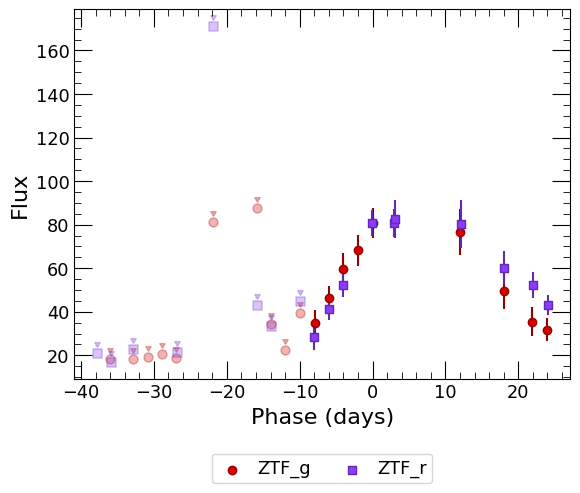

In [5]:
photometry.phase()
corr_lcs = []
for lc in photometry.light_curves:
    corr_lcs.append(
        lc.correct_extinction(coordinates=transient.coordinates)
    )
photometry = Photometry(corr_lcs)
transient.photometry = photometry

fig, ax = plt.subplots()

photometry.plot(ax, mags=False)
formatter.add_legend(ax)
formatter.make_plot_pretty(ax)
plt.show()


Now let's save this file for later use:

In [6]:
# all data will be saved in root directory "data" folder
import os
from pathlib import Path

p = Path(os.getcwd()).parents[1]
SAVE_DIR = os.path.join(p, "data")
print(SAVE_DIR)

/n/holylabs/LABS/avillar_lab/Users/kdesoto/python_repos/superphot-plus/data


In [7]:
transient.save(
    os.path.join(SAVE_DIR, test_sn+".h5")
)

For our numpyro samplers, we need to pad all bands to have the same number of points. To do this, we create a padded variant of our transient photometry:

/n/holylabs/LABS/avillar_lab/Users/kdesoto/python_repos/superphot-plus/data
                               flux     flux_unc        mag       mag_unc  \
time                                                                        
-8 days +02:01:21.498244  34.915897     5.993395  19.820565      0.186369   
-7 days +23:35:31.502413  46.142466     5.606675  19.517871      0.131926   
-4 days +00:06:00.503999  59.490552     7.597043  19.242003      0.138650   
-2 days +01:01:29.504651  68.309326     7.181017  19.091923      0.114138   
0 days 00:27:03.499201    80.693174     6.830148  18.911031      0.091900   
12 days 01:02:11.503659   76.641501    10.743283  18.966963      0.152194   
18 days 00:06:40.498552   49.723673     8.398609  19.436715      0.183387   
21 days 22:24:42.505907   35.524829     6.581046  19.801793      0.201135   
24 days 00:05:31.499530   31.838339     5.382187  19.920747      0.183541   
1000 days 00:00:00         0.100000  1000.000000  26.400000  10857.362048   


findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: F

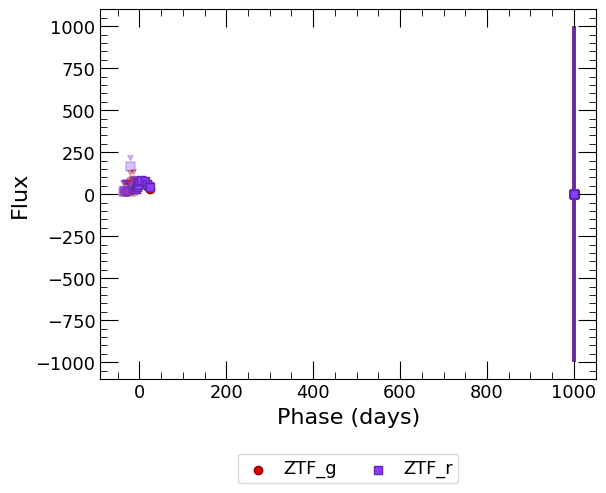

In [1]:
from astropy.time import Time
import astropy.units as u
from snapi import Transient, Formatter
import os
from pathlib import Path
import matplotlib.pyplot as plt
from snapi import Photometry

test_sn = "2022abfi"
p = Path(os.getcwd()).parents[1]
SAVE_DIR = os.path.join(p, "data")
print(SAVE_DIR)

transient = Transient.load(
    os.path.join(SAVE_DIR, test_sn+".h5"),
)

padded_lcs = set()
fill = {'time': 1000., 'flux': 0.1, 'flux_unc': 1000., 'zpt': 23.90, 'non_detections': False}

padded_lcs = []
for lc in transient.photometry.light_curves:
    padded_lc=lc.pad(fill, 32 - len(lc.detections))
    padded_lcs.append(padded_lc)
    print(padded_lc.detections)

padded_photometry = Photometry(padded_lcs)
transient.photometry = padded_photometry
transient.save(
    os.path.join(SAVE_DIR, test_sn+"_padded.h5")
)
formatter = Formatter()
fig, ax = plt.subplots()
padded_photometry.plot(ax, mags=False)
formatter.add_legend(ax)
formatter.make_plot_pretty(ax)
plt.show()


## Fitting Light Curves

There are a few sampling techniques implemented for rapid fitting of light curves:
* Nested sampling (`dynesty`) constrains the posterior space with nested ellipsoids of increasing density.
* Advanced HMC with the NUTS sampler (using `numpyro`) uses Hamiltonian Monte Carlo sampling but without U-turns to increase sampling efficiency.
* Stochastic variational inference (SVI; also using `numpyro`) approximates the marginal distributions for each fit as Gaussians, which sacrifices precision for much faster runtime. Recommended for realtime applications.

Let's use each to fit our test light curve:

In [1]:
from snapi import Transient
import os

from superphot_plus.samplers.dynesty_sampler import DynestySampler
from superphot_plus.samplers.numpyro_sampler import NUTSSampler, SVISampler
from superphot_plus.surveys.surveys import Survey

from pathlib import Path

p = Path(os.getcwd()).parents[1]
SAVE_DIR = os.path.join(p, "data")
test_sn = "2022abfi"
fn_to_fit = os.path.join(SAVE_DIR, test_sn + ".h5")
transient = Transient.load(fn_to_fit)
photometry = transient.photometry
priors = Survey.ZTF().priors

2024-11-06 14:37:38.013929: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-06 14:37:38.033832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730921858.055792   30102 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730921858.062600   30102 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 14:37:38.086896: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
%%time

import traceback
import warnings
import sys

def warn_with_traceback(message, category, filename, lineno, file=None, line=None):

    log = file if hasattr(file,'write') else sys.stderr
    traceback.print_stack(file=log)
    log.write(warnings.formatwarning(message, category, filename, lineno, line))

warnings.showwarning = warn_with_traceback

sampler = DynestySampler(
    priors=priors,
    random_state=42
)
sampler.fit_photometry(photometry)
sampler.result.save(
    save_prefix=test_sn+"_result",
    save_folder=SAVE_DIR
)
print("Nested sampling")
print(sampler.result.fit_parameters.head())

0
Nested sampling
      log_A      beta  log_gamma        t0  log_tau_rise  log_tau_fall  \
0  0.110236  0.015269   1.346290 -4.035558      0.560626      1.227210   
1  0.137571  0.008782   1.220864 -3.537459      0.714683      1.195065   
2  0.054498  0.004893   1.144740 -5.805447      0.561130      1.344853   
3  0.046833  0.005468   1.277754 -4.952361      0.513268      1.294674   
4  0.045118  0.009213   1.231321 -5.380129      0.447262      1.464261   

   log_extra_sigma  log_A_ZTF_g  beta_ZTF_g  log_gamma_ZTF_g  t0_ZTF_g  \
0        -1.671306    -0.027575   -0.003237        -0.165697 -1.344863   
1        -1.813012    -0.106372   -0.007340        -0.174396 -3.469908   
2        -1.340947    -0.119147    0.001028         0.215109 -1.845835   
3        -1.668853    -0.053575   -0.003313        -0.148949 -1.362983   
4        -1.493033    -0.028916   -0.000606         0.033081 -0.312570   

   log_tau_rise_ZTF_g  log_tau_fall_ZTF_g  log_extra_sigma_ZTF_g  
0           -0.071825    

In [3]:
%%time

# use padded photometry
padded_fn = os.path.join(SAVE_DIR, test_sn + "_padded.h5")
pad_transient = Transient.load(padded_fn)
pad_photometry = pad_transient.photometry

sampler = NUTSSampler(
    priors=priors,
    pad_size=32,
    num_chains=1,
    random_state=42
)
sampler.fit_photometry(pad_photometry)
sampler.result.save(
    save_prefix=test_sn+"_result",
    save_folder=SAVE_DIR
)
print("NUTS")
print(sampler.result.fit_parameters.head())

0


sample: 100%|██████████| 20000/20000 [01:34<00:00, 212.24it/s, 83 steps of size 4.91e-02. acc. prob=0.88] 


NUTS
      log_A      beta  log_gamma        t0  log_tau_rise  log_tau_fall  \
0  0.095479  0.008554   1.130349 -4.277979      0.484744      1.412743   
1  0.078558  0.006740   1.246101 -4.956548      0.631933      1.199235   
2  0.081510  0.005633   1.238023 -4.937540      0.658379      1.240648   
3  0.086636  0.005304   1.243914 -4.937827      0.627810      1.184189   
4  0.084409  0.006613   1.259872 -4.718697      0.615192      1.313782   

   log_extra_sigma  log_A_ZTF_g  beta_ZTF_g  log_gamma_ZTF_g  t0_ZTF_g  \
0        -1.751628    -0.045223    0.002151         0.026248 -0.412898   
1        -1.433193    -0.033014   -0.001068         0.049214 -1.214809   
2        -1.569052    -0.045352   -0.000221         0.044272 -1.344695   
3        -1.537760    -0.043589   -0.000235         0.048354 -1.211729   
4        -1.558482    -0.022390    0.003911        -0.038483 -1.347256   

   log_tau_rise_ZTF_g  log_tau_fall_ZTF_g  log_extra_sigma_ZTF_g  
0           -0.075035           -0.195

In [4]:
%%time

# use padded photometry
padded_fn = os.path.join(SAVE_DIR, test_sn + "_padded.h5")
pad_transient = Transient.load(padded_fn)
pad_photometry = pad_transient.photometry

sampler = SVISampler(
    priors=priors,
    num_iter=10_000,
    random_state=42,
    pad_size=32
)
sampler.fit_photometry(pad_photometry)
sampler.result.save(
    save_prefix=test_sn+"_result",
    save_folder=SAVE_DIR
)
print("SVI")
print(sampler.result.fit_parameters.head())

0
Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=3/0)>
SVI
      log_A      beta  log_gamma        t0  log_tau_rise  log_tau_fall  \
0  0.083098  0.011248   1.267548 -4.377553      0.507379      1.339393   
1  0.096079  0.012853   1.298249 -4.034968      0.567564      1.393087   
2  0.092239  0.012379   1.289168 -4.136306      0.549761      1.377204   
3  0.074595  0.010197   1.247437 -4.601964      0.467954      1.304220   
4  0.065249  0.009041   1.225331 -4.848629      0.424620      1.265560   

   log_extra_sigma  log_A_ZTF_g  beta_ZTF_g  log_gamma_ZTF_g  t0_ZTF_g  \
0        -1.670770    -0.042263    0.001378         0.051744 -1.325508   
1        -1.388816    -0.021351    0.003594         0.091966 -0.830293   
2        -1.472219    -0.027537    0.002938         0.080068 -0.976779   
3        -1.855464    -0.055962   -0.000073         0.025398 -1.649899   
4        -2.058474    -0.071019   -0.001668        -0.003562 -2.006459   

   log_tau_rise_ZTF_g  log_tau_fall_ZTF_g

Now, let's plot each fit to compare results!

0
0
0
0.7128226078368898


  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/n/holylabs/LABS/avillar_lab/Users/kdesoto/conda_envs/snapi_env/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/n/holylabs/LABS/avillar_lab/Users/kdesoto/conda_envs/snapi_env/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/n/holylabs/LABS/avillar_lab/Users/kdesoto/conda_envs/snapi_env/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/n/holylabs/LABS/avillar_lab/Users/kdesoto/conda_envs/snapi_env/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/n/holylabs/LABS/avillar_lab/Users/kdesoto/conda_envs/snapi_env/lib/python3.11/asyncio/base_events.py", line 604, in run_forever
    self._run_once()
  File "/n/holylabs/LABS

0.16568413
0.18245791


findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: F

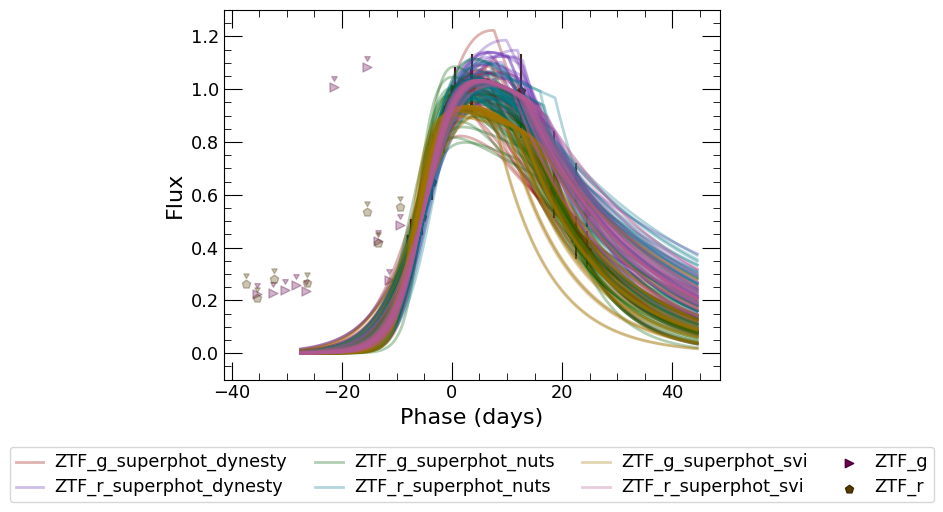

In [5]:
from superphot_plus.samplers import *
from snapi import Formatter
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
formatter = Formatter()
dsampler = DynestySampler(priors=priors)
nsampler = NUTSSampler(priors=priors, pad_size=32)
ssampler = SVISampler(priors=priors, pad_size=32)
for sampler in [dsampler, nsampler, ssampler]:
    sampler.load_result(
        load_prefix=test_sn+"_result",
        load_folder=SAVE_DIR
    )
    print(sampler.result.score)
    ax = sampler.plot_fit(
        ax, formatter,
        photometry,
    )
photometry.plot(ax, formatter, mags=False)
ax.set_ylim((-0.1, 1.3))
formatter.add_legend(ax)
formatter.make_plot_pretty(ax)
plt.show()


It looks like there is a tradeoff between fit time and fit quality, though there may be an issues with priors. Plotting the distribution for our differing parameters ($t0$ and $\gamma$), we get:

In [ ]:
from superphot_plus.file_utils import get_posterior_samples

params_dynesty = get_posterior_samples(
    test_sn, fits_dir=OUTPUT_DIR, sampler='dynesty'
)[0]
params_NUTS = get_posterior_samples(
    test_sn, fits_dir=OUTPUT_DIR, sampler='NUTS'
)[0]
params_svi = get_posterior_samples(
    test_sn, fits_dir=OUTPUT_DIR, sampler='svi'
)[0]
print(params_dynesty[0])

t0_idx = 3
gamma_idx = 2

plt.hist(params_dynesty[:, t0_idx], alpha=0.5, label="dynesty", density=True)
plt.hist(params_NUTS[:, t0_idx], alpha=0.5, label="NUTS", density=True)
plt.hist(params_svi[:, t0_idx], alpha=0.5, label="SVI", density=True)
plt.xlabel("t0")
plt.legend()
plt.show()

In [ ]:
from superphot_plus.surveys.surveys import Survey

ztf_priors = Survey.ZTF().priors
r_priors = ztf_priors.bands["r"]
PRIOR_GAMMA = r_priors.gamma

plt.hist(params_dynesty[:, gamma_idx], alpha=0.5, label="dynesty", density=True)
plt.hist(params_NUTS[:, gamma_idx], alpha=0.5, label="NUTS", density=True)
plt.hist(params_svi[:, gamma_idx], alpha=0.5, label="SVI", density=True)
plt.axvline(PRIOR_GAMMA.mean, c="r", label="Prior")
plt.axvline(PRIOR_GAMMA.mean + PRIOR_GAMMA.std, c="r", linestyle="dashed")
plt.axvline(PRIOR_GAMMA.mean - PRIOR_GAMMA.std, c="r", linestyle="dashed")
plt.xlabel("log gamma")
plt.xlim((0.5, 2))
plt.legend()
plt.show()

## Classification

Superphot+ uses the resulting fit parameters as input features for a multi-layer perceptron (MLP) classifier. We can call the classification functions to return probabilities of the object being each of 5 major supernova types:

In [8]:
import os
import numpy as np
from superphot_plus.trainer import SuperphotTrainer
from superphot_plus.file_utils import get_posterior_samples

test_sn = "ZTF22abvdwik" 
OUTPUT_DIR = "../examples/outputs/"
TRAINED_MODEL_FN = os.path.join(OUTPUT_DIR, "model.pt")
TRAINED_CONFIG_FN = os.path.join(OUTPUT_DIR, "model.yaml")

trainer = SuperphotTrainer(
    TRAINED_CONFIG_FN,
    OUTPUT_DIR,
    sampler="dynesty",
    model_type='MLP',
    probs_file=None,
    n_folds=1,
)
trainer.setup_model(load_checkpoint=True)
lc_probs = trainer.classify_single_light_curve(
    test_sn, OUTPUT_DIR, sampler="dynesty"
)
# Alternatively, classify from posterior samples directly
fit_params = get_posterior_samples(test_sn, OUTPUT_DIR, "dynesty")[0]
adj_params = np.delete(fit_params, [0,3], axis=1)
lc_probs2 = trainer.models[0].classify_from_fit_params(adj_params)
print(np.subtract(lc_probs, np.mean(lc_probs2, axis=0)))

../examples/outputs
[ 0.01131504  0.34618992 -0.15608865 -0.39089653  0.18947991]
